# Clustering Methods

## The Data

This time a wine quality dataset is being used. The data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorsetup import colors, palette
sns.set_palette(palette)

print('Libraries are imported :)')

Libraries are imported :)


## Data Analysis

* Let's examine which ones are categorical or numerical etc.

In [2]:
data = pd.read_csv('Wine_Quality_Data.csv')

data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [3]:
data.shape

(6497, 13)

* "The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types)." 
* Every feature except quality and color are continuous. ( Cont. means can take any value ) 

In [4]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

The number of entries for each wine color.

In [5]:
(data['color'].value_counts())

white    4898
red      1599
Name: color, dtype: int64

In [6]:
data['quality'].value_counts().sort_index(ascending = False)

9       5
8     193
7    1079
6    2836
5    2138
4     216
3      30
Name: quality, dtype: int64

The distribution of quality values. We have 7 different qualities.

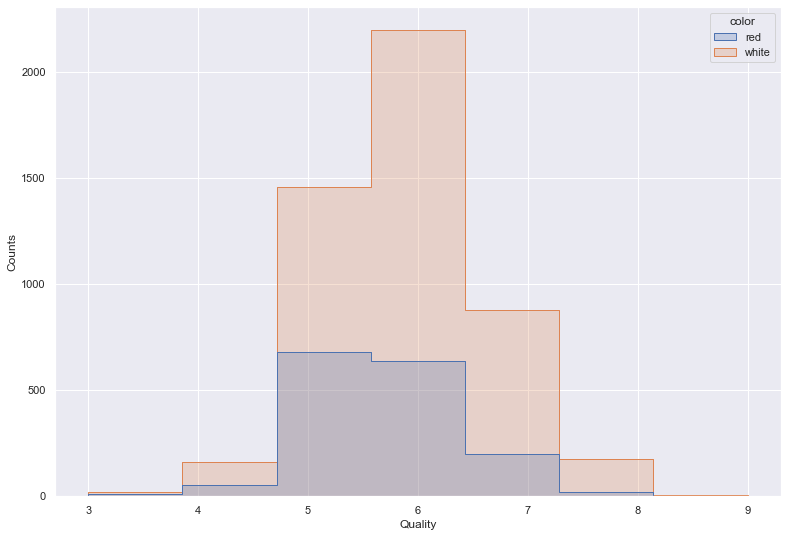

In [7]:
sns.set_theme()
plt.figure(figsize= (13,9))
sns.histplot(x = 'quality', hue = 'color', data = data, bins = len(data['quality'].value_counts()), element = 'step')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.show()

#### Examining the correlation and skew of the relevant variables


In [8]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,0.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,0.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,0.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,0.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,0.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,0.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,0.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,0.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,0.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,0.000000,-0.003029


In [9]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

And an examination of the skew values in anticipation of transformations.

In [10]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [11]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])


Perform feature scaling.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(-5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red
1,0.550261,3.012817,-2.192833,-0.498175,1.281999,-0.013944,-0.862469,0.701486,-0.115073,1.059213,-0.580068,5,red
2,0.550261,2.438032,-1.917553,-0.625740,1.104012,-0.754684,-1.092486,0.768188,0.258120,0.862549,-0.580068,5,red
3,2.802728,-0.337109,1.661085,-0.815173,0.594352,-0.574982,-0.986324,1.101694,-0.363868,0.389396,-0.580068,6,red
4,0.229509,2.135767,-2.192833,-0.815173,0.624554,-1.193601,-1.446359,1.034993,1.813090,0.250355,-0.915464,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,-0.281461,-0.755481,0.284686,-1.220179,-0.108169,0.604676,0.199149,-0.465786,-1.110254,0.109519,-1.083162,5,white
6488,-2.206329,-0.648990,-0.334694,1.355808,-0.794667,0.439574,0.039907,0.234577,-0.923657,-0.177723,-0.915464,6,white
6489,-0.929784,0.062095,-0.197054,-0.670853,-0.605997,-0.013944,-0.278579,-1.773132,-0.985856,-0.623279,1.096912,6,white
6490,-1.329603,-0.827205,0.009406,-1.435109,-0.543350,0.604676,0.092988,-1.319563,0.133722,-0.472730,0.090724,6,white


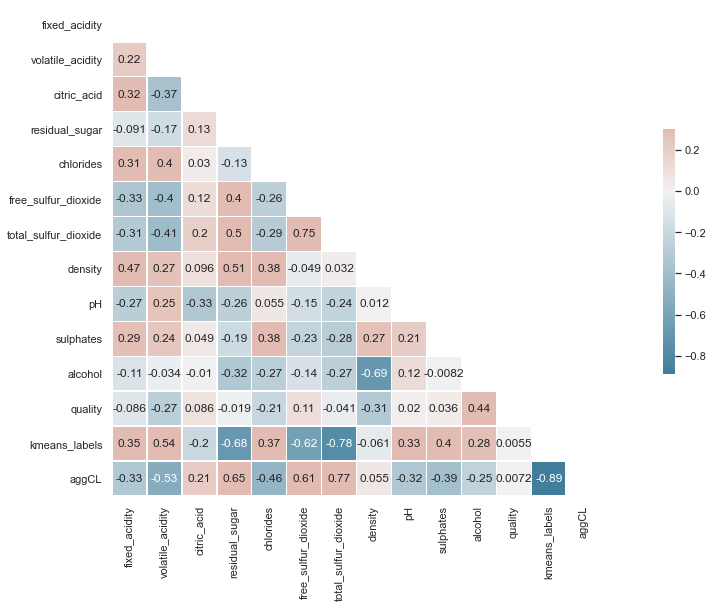

In [33]:
# Alternatively

sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The pairplot of the transformed and scaled features.

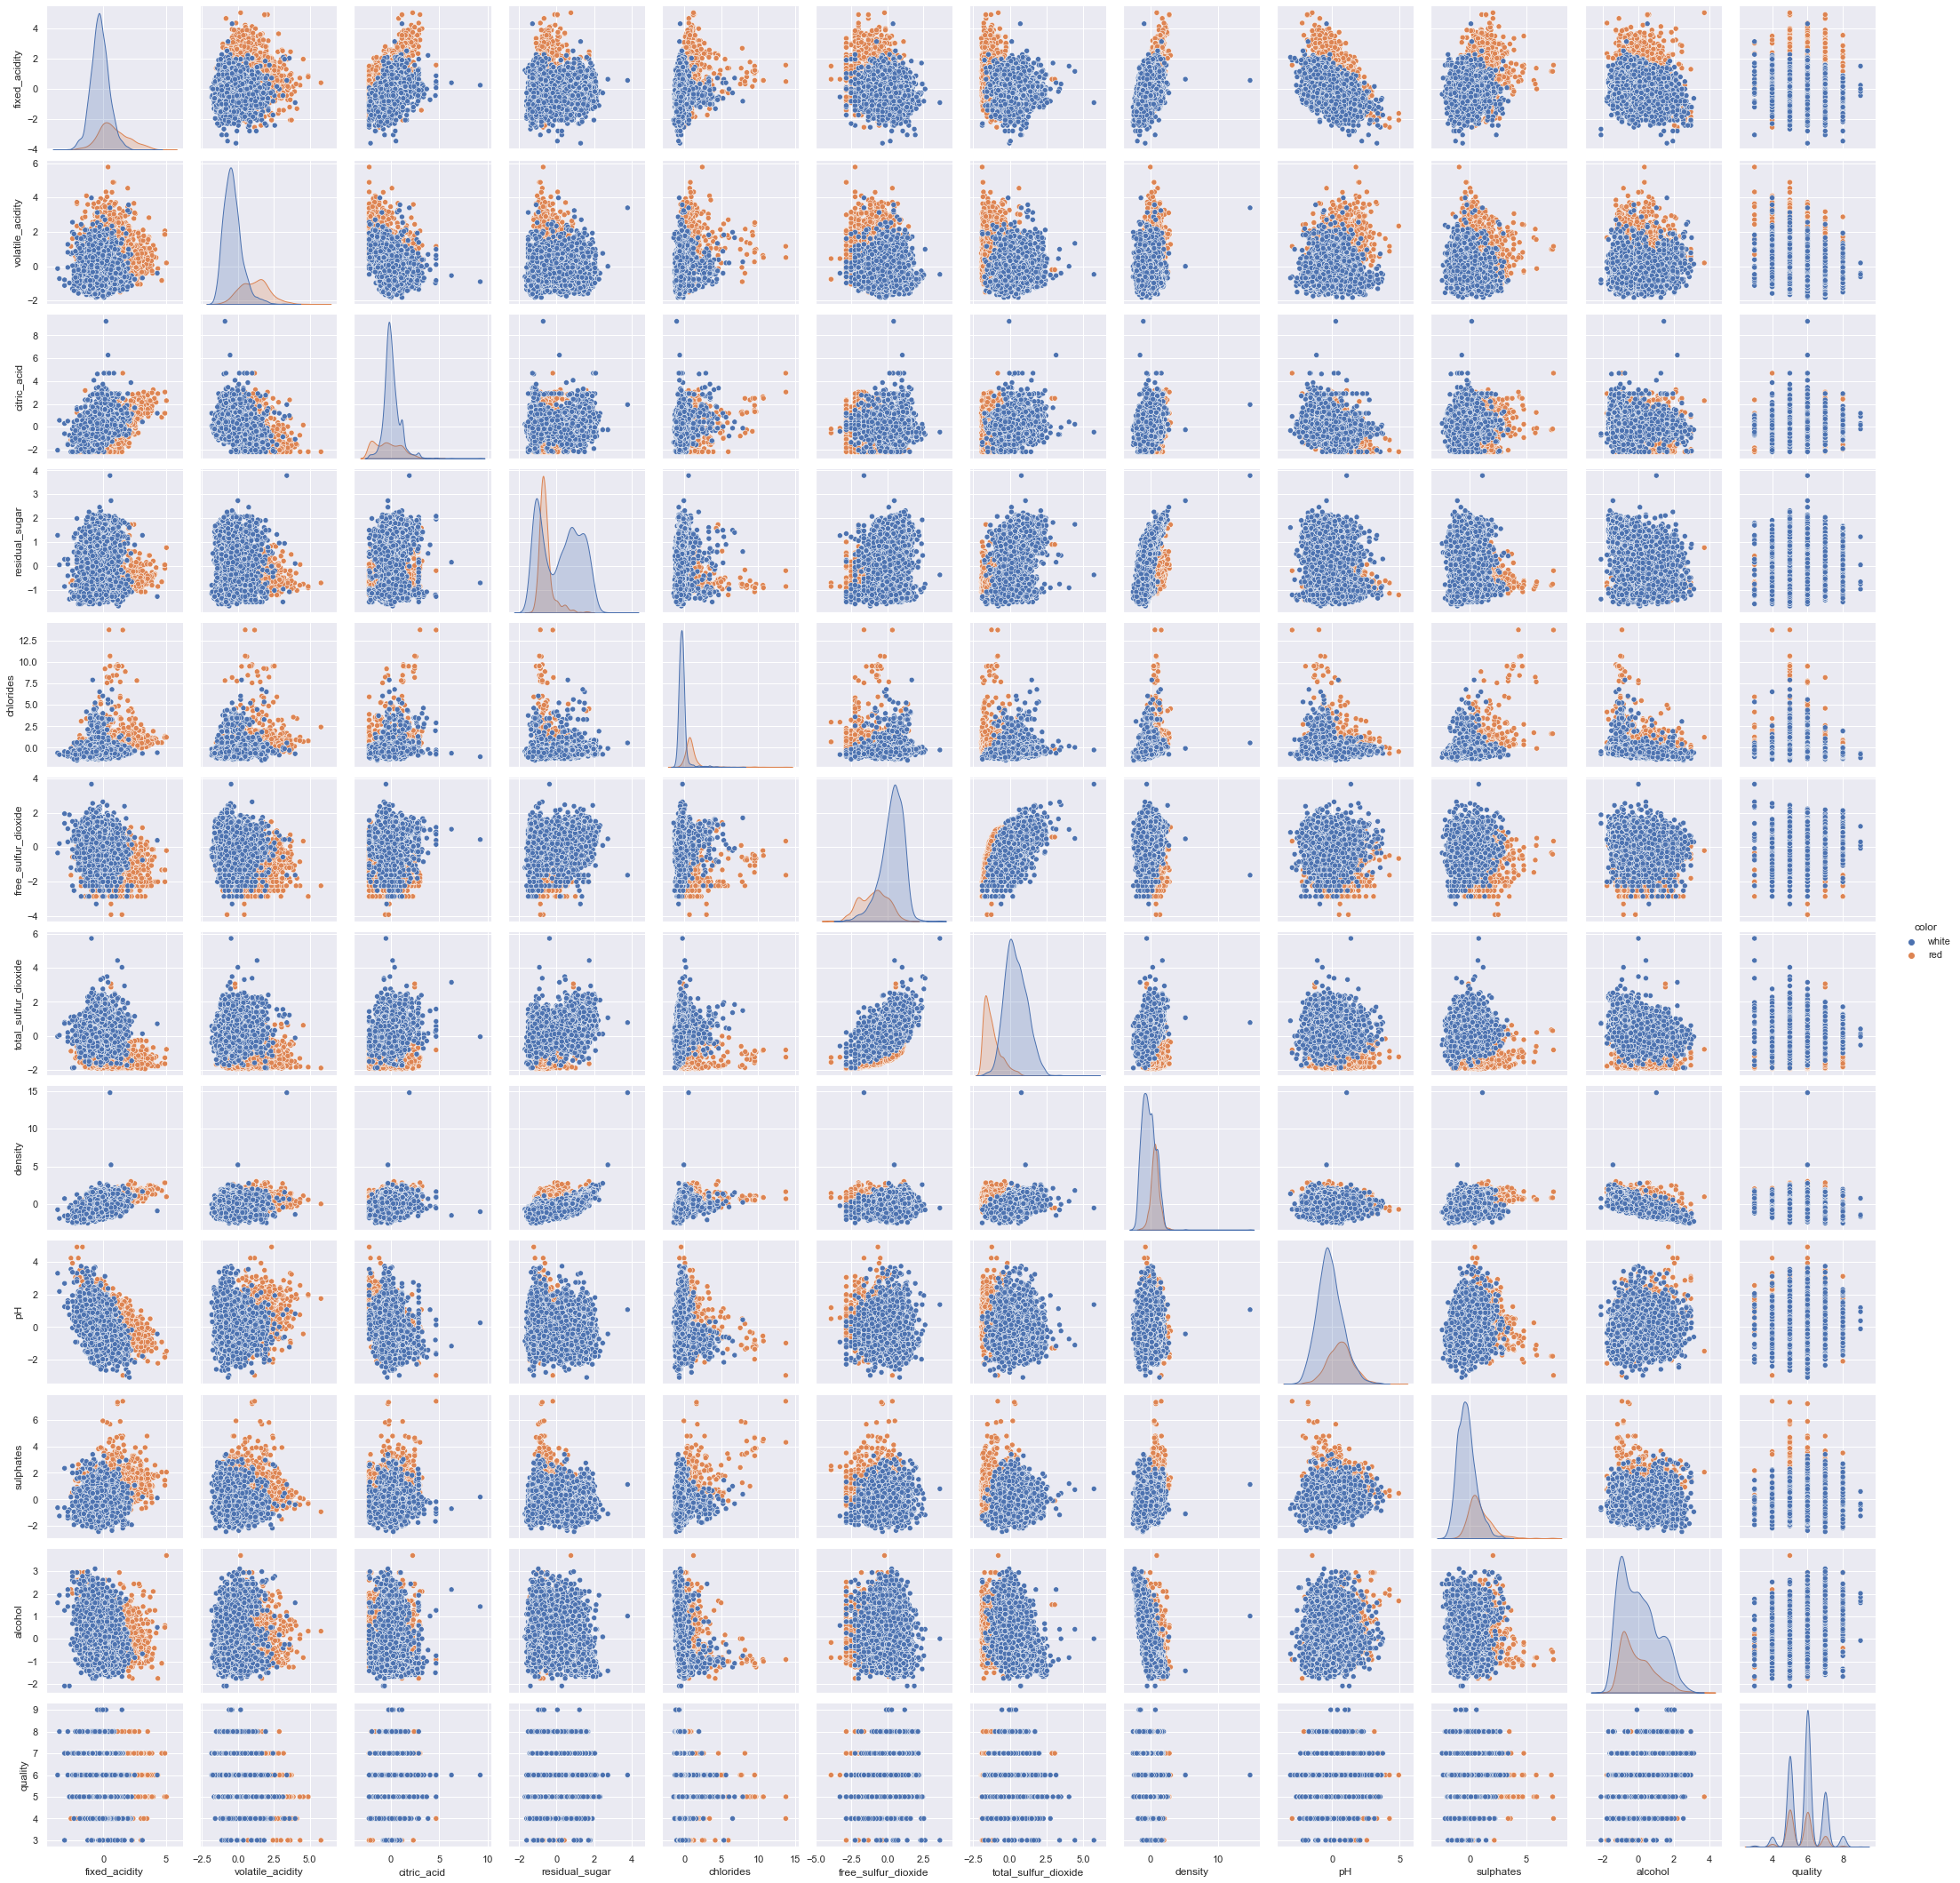

In [13]:
sns.set_theme()
sns.pairplot(data = data, 
             hue='color', 
             hue_order=['white', 'red'])

### Fit a K-means clustering model with three clusters

In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=13)
km = km.fit(data[float_columns])

data['kmeans_labels'] = km.predict(data[float_columns])

In [15]:
data['kmeans_labels'].head(-5)

0       2
1       2
2       2
3       2
4       2
       ..
6487    1
6488    0
6489    1
6490    1
6491    1
Name: kmeans_labels, Length: 6492, dtype: int32

In [16]:
(data[['color','kmeans_labels']]
 .groupby(['kmeans_labels','color'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans_labels color        
0             red         8
              white    2152
1             red        49
              white    2681
2             red      1542
              white      65

### Finding best K

* Fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 

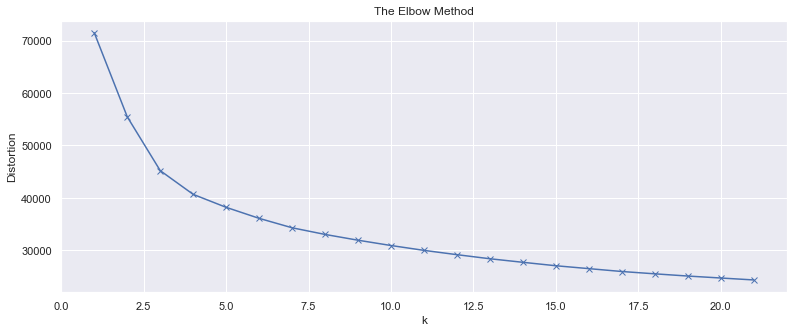

In [17]:
distortions = []
K = range(1,22)
for k in K:
    kmean = KMeans(n_clusters=k, random_state= 13, n_init = 50, max_iter = 500)
    kmean.fit(data[float_columns])
    distortions.append(kmean.inertia_)

plt.figure(figsize=(13,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

* Were you able to spot the best k?

### Fitting an agglomerative clustering model with three clusters.


In [18]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['aggCL'] = ag.fit_predict(data[float_columns])
data['aggCL'].head(-5)

0       0
1       0
2       0
3       0
4       0
       ..
6487    1
6488    2
6489    1
6490    1
6491    1
Name: aggCL, Length: 6492, dtype: int64

Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both K-means and agglomerative clustering.

In [19]:
# First, for Agglomerative Clustering:
(data[['color','aggCL','kmeans_labels']]
 .groupby(['color','aggCL'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color aggCL        
red   0        1568
      1          27
      2           4
white 0         143
      1        3005
      2        1750

In [20]:
# Comparing with KMeans results:
(data[['color','aggCL','kmeans_labels']]
 .groupby(['color','kmeans_labels'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color kmeans_labels        
red   0                   8
      1                  49
      2                1542
white 0                2152
      1                2681
      2                  65

In [21]:
# Comparing results:
(data[['color','aggCL','kmeans_labels']]
 .groupby(['color','aggCL','kmeans_labels'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color aggCL kmeans_labels        
red   0     0                   1
            1                  33
            2                1534
      1     0                   3
            1                  16
            2                   8
      2     0                   4
white 0     0                  69
            1                  39
            2                  35
      1     0                 396
            1                2580
            2                  29
      2     0                1687
            1                  62
            2                   1

* Plot of the dendrogram created from agglomerative clustering.

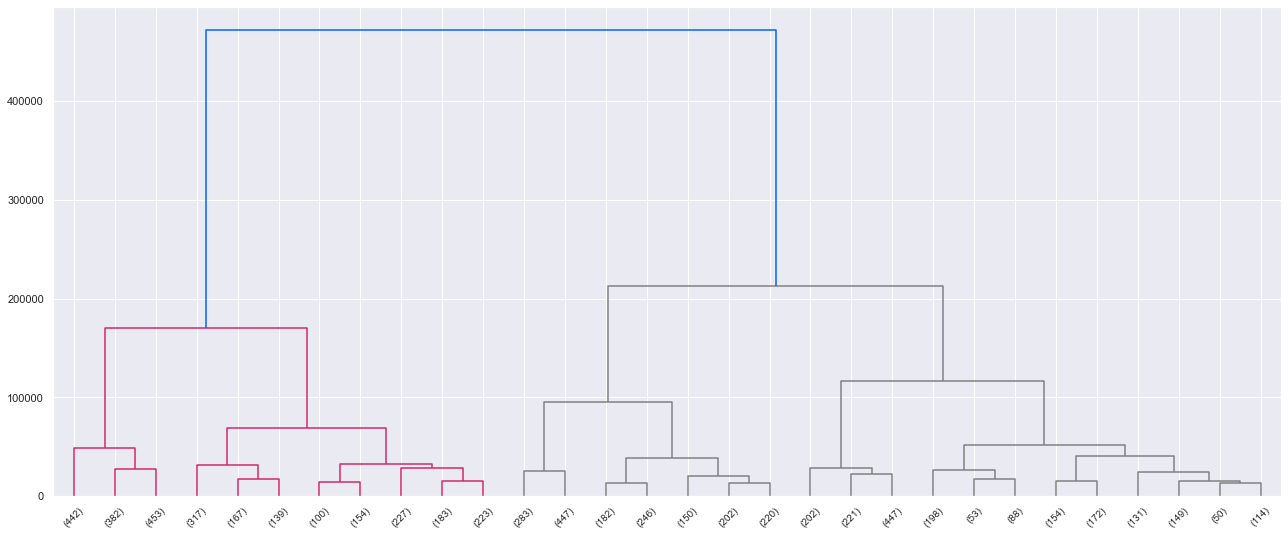

In [25]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(22,9))

# Some color setup
red = colors[2]
blue = colors[0]

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

### Clustering as a form of feature engineering

* Compare the average roc-auc scores for both models, the one using the KMeans cluster as a feature and the one that doesn't use it.


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

y = (data['quality'] > 6).astype(int)
X_with_kmeans = data.drop(['aggCL', 'color', 'quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans_labels', axis=1)
sss = StratifiedShuffleSplit(n_splits=13, random_state=13)

def get_avg_roc_13splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_13splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_13splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is --> \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is --> \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is --> "0.9232294659961687"
Using kmeans cluster as input to Random Forest, roc-auc is --> "0.9242437325007369"


* Fit 13 **Logistic Regression** models and compute the average roc-auc-score

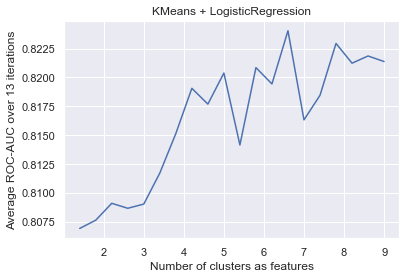

In [30]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=13, random_state=13)

def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)

estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_13splits(estimator, create_kmeans_columns(n), y)
                for n in ns]

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average ROC-AUC over 13 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)